# Lab Exam 1A

In [ ]:
from commonfunctions import *
from BassemFunctions import *
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import all modules from LabsMethods folder
from LabsMethods.Morph import *
from LabsMethods.ContrastEnhancement import *
from LabsMethods.EdgeDetection import *
from LabsMethods.Segmentation import *
from LabsMethods.Segmentation2 import *
from LabsMethods.Smoothing import *
from HelperForQuestion.ImproveImage import *
from HelperForQuestion.DetectSpecificShapes import *
from HelperForQuestion.HistogramQuestions import *

### Question 1

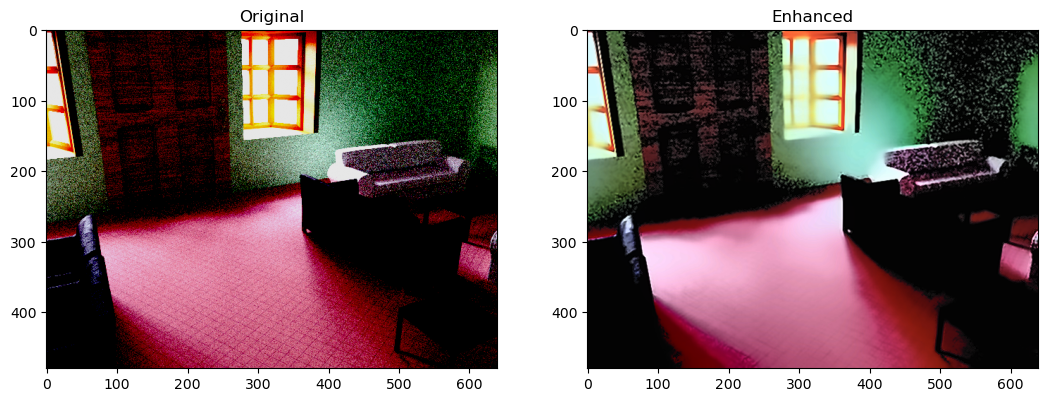

In [2]:

# Example usage with updated parameters
custom_params = {
    'median_kernel': 3,
    'gaussian_kernel': (3,3),
    'gaussian_sigma': 1,
    'clahe_clip': 3,
    'clahe_grid': (2,2),
    'nlmeans_h': 15,
    'nlmeans_template': 11,
    'nlmeans_search': 35,
    'sharpen_strength': 5,
    'white_balance_strength': 1
}

# Process image
img_rgb = preprocess_image('Q1.png', 'rgb')
enhanced_image = enhance_image(img_rgb, custom_params)

# Show results
show_images([img_rgb, enhanced_image], 
           ['Original', 'Enhanced'])

### Question 2

Detected 9 points
Point 1: (135, 142)
Point 2: (181, 105)
Point 3: (87, 182)
Point 4: (99, 98)
Point 5: (175, 192)
Point 6: (144, 61)
Point 7: (221, 155)
Point 8: (50, 137)
Point 9: (126, 231)


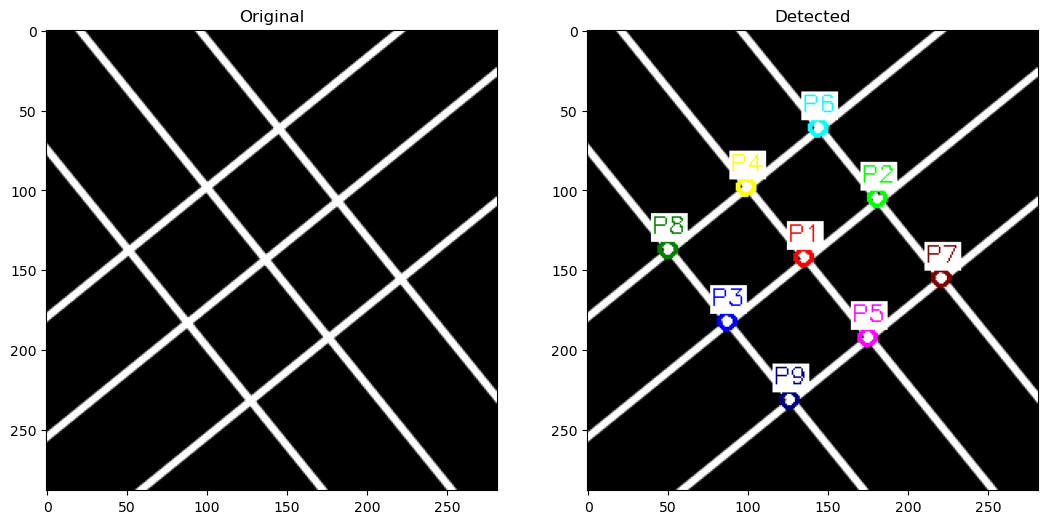

In [3]:
# Process image
img_gray = preprocess_image('Q2.png', 'grayscale')

# Detect points

points = detect_points(img_gray)
print(f"Detected {len(points)} points")
marked_img, mapping = draw_detected_points(img_gray, points)

# Print point mapping
for point, info in mapping.items():
    print(f"{point}: {info['coordinates']}")

# Show results
show_images([img_gray, marked_img], 
           ['Original', 'Detected'])


### Question 4

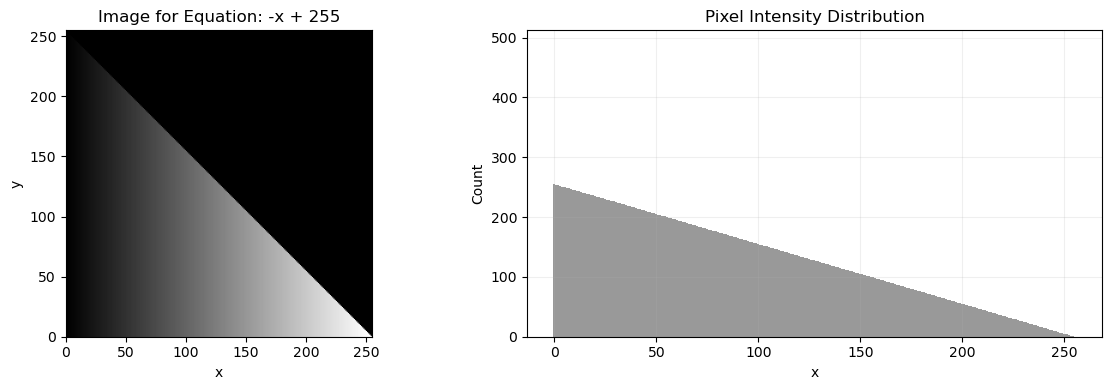

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr



def create_histogram_from_equation(equation_str, width=256, height=256):
    """
    Create histogram values from mathematical equation.
    """
    # Parse equation
    x = sp.Symbol('x')
    expr = parse_expr(equation_str)
    
    # Generate x values and evaluate equation
    x_vals = np.linspace(0, 255, width)
    equation_func = sp.lambdify(x, expr, 'numpy')
    y_vals = equation_func(x_vals)
    
    # Normalize y-values
    y_vals = np.clip(y_vals, 0, None)
    if y_vals.max() > 0:
        y_vals = (y_vals / y_vals.max() * (height - 1)).astype(int)
    
    return y_vals

def generate_image_from_histogram(hist_values, width=256, height=256):
    """
    Generate grayscale image from histogram values.
    Each column x is filled with intensity value x up to histogram height.
    
    Args:
        hist_values: Array of histogram values for each intensity level
        width: Width of output image (default 256 for intensity levels)
        height: Height of output image (default 256)
        
    Returns:
        grayscale image as numpy array (height x width)
    """
    # Create empty black image
    image = np.zeros((height, width), dtype=np.uint8)
    
    # Process each column (x position/intensity level)
    for x, count in enumerate(hist_values):
        if count > 0:
            # Fill column with intensity value x up to count height
            # Start from bottom of image (height-count) up to height
            start_row = height - count
            image[start_row:height, x] = x
            
    return image

def display_histogram_and_image(image, hist_values, equation_str=None, y_max=None):
    """
    Display histogram and corresponding image.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Display image
    ax1.imshow(image, cmap='gray', extent=[0, 255, 0, 255])
    title = "Image" if equation_str is None else f"Image for Equation: {equation_str}"
    ax1.set_title(title)
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.axis("on")
    
    # Plot histogram
    ax2.bar(np.arange(256), hist_values, width=1, color='gray', alpha=0.8)
    ax2.set_title("Pixel Intensity Distribution")
    ax2.set_xlabel("x")
    ax2.set_ylabel("Count")
    ax2.grid(True, alpha=0.2)
    if y_max is not None:
        ax2.set_ylim(0, y_max)
    
    plt.tight_layout()
    plt.show()

# Example Usage:
equation = "-x + 255"
hist_values = create_histogram_from_equation(equation)
image = generate_image_from_histogram(hist_values)

display_histogram_and_image(image, hist_values, equation, y_max=512)